# This notebook simulates the di-lepton decays of HNLs


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *
from matplotlib.legend_handler import HandlerLine2D

from HNL_MC import *
from HNL_MC import hnl_tools
from HNL_MC.const import *
from HNL_MC import nuH_gen as gen
from HNL_MC.plot_style import *


### Generate and load events

In [3]:
PATH = 'data/MC_samples'
hels = ['LH','RH', 'both']
vertices = ['CConly', 'NConly', 'CCandNC']
hnltypes = ['majorana','dirac']
hnlmasses = [0.02,0.05,0.1,0.150]
my_mixing = [0.0,1.0,0.0]
dfs = {}
for h in hels:
    for vertex in vertices:
        for hnltype in hnltypes:
            for hnlmass in hnlmasses:
                gen.generate_events(hnlmass, mixings=my_mixing, lepton_mass=m_e, 
                                    HNLtype=hnltype, HEL=h, 
                                    modify_vertex=vertex)
                dfs[f'{hnlmass}_ee_{h}_{hnltype}_{vertex}'] = pd.read_pickle(f'{PATH}/MC_m4_{hnlmass:.8g}_mlepton_{m_e:.8g}_hel_{h}_{hnltype}_{vertex}.pckl')
                

data/mc_samples/MC_m4_0.02_mlepton_0.00051099895_hel_LH_majorana_CConly.pckl
data/mc_samples/MC_m4_0.05_mlepton_0.00051099895_hel_LH_majorana_CConly.pckl
data/mc_samples/MC_m4_0.1_mlepton_0.00051099895_hel_LH_majorana_CConly.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_majorana_CConly.pckl
data/mc_samples/MC_m4_0.02_mlepton_0.00051099895_hel_LH_dirac_CConly.pckl
data/mc_samples/MC_m4_0.05_mlepton_0.00051099895_hel_LH_dirac_CConly.pckl
data/mc_samples/MC_m4_0.1_mlepton_0.00051099895_hel_LH_dirac_CConly.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_dirac_CConly.pckl
data/mc_samples/MC_m4_0.02_mlepton_0.00051099895_hel_LH_majorana_NConly.pckl
data/mc_samples/MC_m4_0.05_mlepton_0.00051099895_hel_LH_majorana_NConly.pckl
data/mc_samples/MC_m4_0.1_mlepton_0.00051099895_hel_LH_majorana_NConly.pckl
data/mc_samples/MC_m4_0.15_mlepton_0.00051099895_hel_LH_majorana_NConly.pckl
data/mc_samples/MC_m4_0.02_mlepton_0.00051099895_hel_LH_dirac_NConly.pckl
data/mc_samples/M

#### compute kinematical variables

In [148]:
# compute useful variables
for key in dfs.keys():
    gen.compute_kin_vars(dfs[key])

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [140]:
# Plotting variables

In [316]:
my_list_of_colors = ['black','purple','darkorange','royalblue']
my_list_of_dashes = ['-','-','-','-']
my_hatches = ['/////////////////////////////',
              '/////////////////////////////',
              '/////////////////////////////',
              '/////////////////////////////']

def plot_varying_m4(var,MIN,MAX, filename='new', xlabel=var, colors=my_list_of_colors, units = 1):

    fig,ax = get_fig()

    vertex='CCandNC'
    hnltype='dirac'
    hel='RH'
    
    for i in range(len(hnlmasses)):
        mN = hnlmasses[i]
        my_histogram(ax, dfs[f'{mN}_ee_{hel}_{hnltype}_{vertex}'], var, var_range=(MIN, MAX), units = units,
                     color=colors[i],label=fr'$m_N = {mN*1e3}$ MeV', density=True, ls=my_list_of_dashes[i], hatch=my_hatches[i])
    ax.patch.set_alpha(0.0)

    ax.legend(loc='upper right',frameon=False,ncol=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(r"a.u.")
    ax.set_xlim(MIN,MAX)
    ax.set_ylim(0.,ax.get_ylim()[1]*1.3)
    # ax.set_yscale('log')
    ax.set_title(r"$N \to \nu e^+e^-$",fontsize=fsize)
    plt.savefig(f"plots/kinematics/{filename}.png", dpi=400)

/usr/local/lib/python3.9/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/usr/local/lib/python3.9/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/usr/local/lib/python3.9/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/usr/local/lib/python3.9/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/usr/local/lib/python3.9/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/usr/local/lib/python3.9/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/usr/local/lib/python3

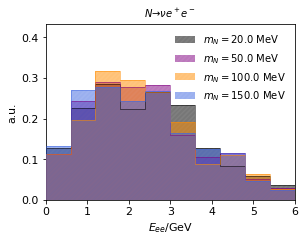

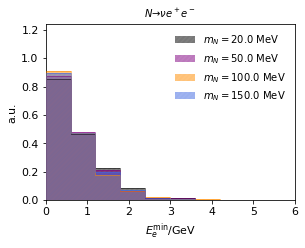

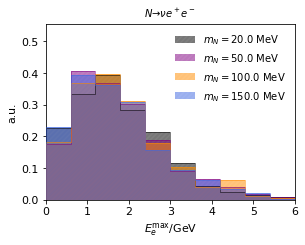

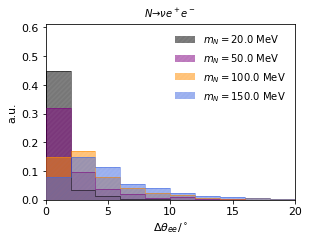

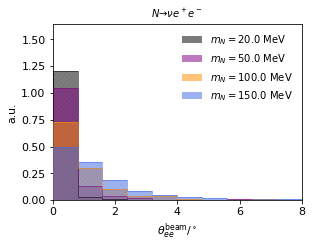

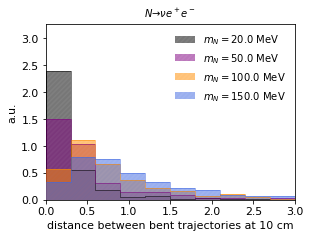

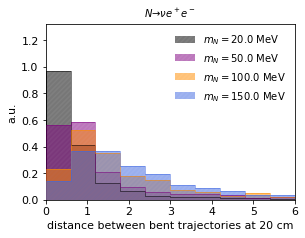

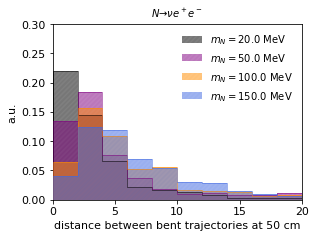

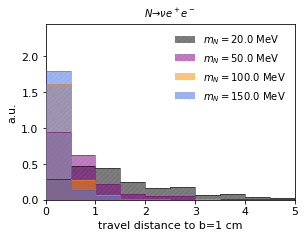

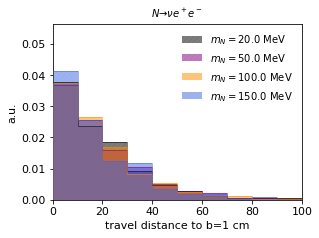

In [317]:
plot_varying_m4('ee_momentum',0,6, filename='ee_momentum', xlabel=r'$E_{ee}/$GeV')
plot_varying_m4('e_smallest',0,6, filename='e_smallest', xlabel=r'$E_{e}^{\rm min}/$GeV')
plot_varying_m4('e_largest',0,6, filename='e_largest', xlabel=r'$E_{e}^{\rm max}/$GeV')
plot_varying_m4('ee_theta',0,20, units = 180/np.pi, filename='ee_theta', xlabel=r'$\Delta \theta_{ee}/^\circ$')
plot_varying_m4('ee_beam_theta',0,8, units = 180/np.pi, filename='ee_beam_theta', xlabel=r'$\theta_{ee}^{\rm beam}/^\circ$')
plot_varying_m4('distance_between_circles_at_10cm',0,3, units = 1, filename='distance_between_circles_at_10cm', xlabel=r'distance between bent trajectories at 10 cm')
plot_varying_m4('distance_between_circles_at_20cm',0,6, units = 1, filename='distance_between_circles_at_20cm', xlabel=r'distance between bent trajectories at 20 cm')
plot_varying_m4('distance_between_circles_at_50cm',0,20, units = 1, filename='distance_between_circles_at_50cm', xlabel=r'distance between bent trajectories at 50 cm')
plot_varying_m4('race_to_b=1cm',0,5, units = 1e-2, filename='race_to_b1cm', xlabel=r'travel distance to b=1 cm')
plot_varying_m4('radius_plus',0,100, units = 1e-2, filename='radius_of_curvature', xlabel=r'travel distance to b=1 cm')